###Reads several outputs from ana_climatology.ipynb to make some correlations for VPR

In [145]:
import sys
sys.path.append('/home/silke/Python/radarlecture2016/radarmeteorology/common')
import warnings
warnings.filterwarnings('ignore')
from helper import create_filename
import pandas as pd 
import numpy as np
import datetime as dt
import glob
from scipy import stats
import wradlib as wrl
from scipy import ndimage
import math
import matplotlib.pyplot as pl
import matplotlib as mpl
from matplotlib import colors
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import os
import glob
import scipy
from pandas import rolling_median
import pandas as pd
from scipy.stats import linregress
import numpy.ma as ma
from numpy import asarray as ar
import datetime as dt
from datetime import timedelta
from matplotlib.dates import DayLocator, HourLocator, MinuteLocator,DateFormatter, drange
from scipy.stats.stats import pearsonr
from scipy.signal import correlate
import matplotlib

In [146]:
#%pylab

In [147]:
def get_miub_cmap():
    startcolor = 'white'  # a dark olive
    color1 = '#8ec7ff'#'cyan'    # a bright yellow
    color2 = 'dodgerblue'
    color3 = 'darkgreen'
    #color3 = 'lime'
    color4 = 'yellow'
    color5 = 'darkorange'
    color6 = 'red'
    #color7 = 'purple'
    endcolor = 'darkmagenta'    # medium dark red
    colors = [startcolor, color1, color2, color3, color4, color5, color6, endcolor]
    return mpl.colors.LinearSegmentedColormap.from_list('miub1',colors)


In [148]:
def add_cbar(im, ticks, norm):
    cbar = pl.colorbar(im[-1], norm=norm, boundaries=ticks, pad=0.05)
    cbar.locator = mpl.ticker.FixedLocator(ticks)
    cbar.update_ticks()
    return cbar

In [149]:
def get_norm(ticks):
    cmap = get_miub_cmap()
    norm = mpl.colors.BoundaryNorm(ticks, cmap.N)
    return norm

In [150]:
def shift(xs, n):
    if n >= 0:
        return np.r_[np.full(n, np.nan), xs[:-n]]
    else:
        return np.r_[xs[-n:], np.full(-n, np.nan)]

#Load output files

In [151]:
datepath="/home/silke/Python/projects/climatology/"
outputf = sorted(glob.glob(datepath + "out*.txt"))
dates=range(len(outputf))
print('outputf',outputf[3])
for l in range(len(outputf)):
    dates[l]=outputf[l][44:54]

###Versteh Fehler nicht, lasse erstmal 2013-05-29 weg
##Ich glaub 2015-04-02 gibts keine Wippeninfo, ebenfalls weg:'2015-05-03', '2015-05-29', '2015-06-02','2015-06-13', '2015-06-23', '2015-07-13','2015-07-26', 
#     '2015-08-08','2015-08-16', '2015-08-17', '2015-09-01','2015-09-16'
## Ich glaub 2015-04-04 ist die ML zu niedrig, ebenfalls weg
##'2016-01-10','2016-01-11', '2016-01-13'
##Fast das komplette 2015 hat keine Wippeninfo!!
##high rainrates raus '2013-07-03', '2014-05-06', '2014-08-26',
##nearly high rain rates '2015-06-13','2015-08-08','2015-09-01',
datesredu=['2013-04-12','2014-05-06','2014-05-27','2014-06-28','2014-07-08','2014-07-09','2014-10-07','2014-10-08','2014-11-04','2014-12-12',
       '2015-03-29','2015-04-02','2015-05-03',
       '2015-06-02', '2015-06-23', '2015-08-04','2015-08-17','2015-08-27','2015-09-01','2015-09-13', 
       '2015-09-16','2015-09-22','2015-10-05','2015-11-17', '2015-11-19', '2015-11-29', '2015-12-04', 
       '2015-12-08','2015-12-09',
       '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25','2016-01-07','2016-01-30','2016-09-04']
dates=['2013-04-12','2013-07-03','2014-05-06','2014-05-27','2014-06-28','2014-07-05','2014-07-08',
       '2014-07-09','2014-08-26','2014-10-07','2014-10-08','2014-10-09','2014-10-15','2014-11-04','2014-12-12',     
       '2014-11-16','2014-12-19','2015-01-02','2015-01-08','2015-02-27','2015-03-29','2015-04-02','2015-05-03','2015-05-29',
       '2015-06-02', '2015-06-13','2015-06-22','2015-06-23', '2015-07-13','2015-08-04','2015-08-08','2015-08-17',
       '2015-08-27','2015-09-01','2015-09-13', 
       '2015-09-16','2015-09-22','2015-10-05','2015-11-06','2015-11-17', '2015-11-19', '2015-11-20',
       '2015-11-29', '2015-12-08','2015-12-09',
       '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25','2016-01-02','2016-01-07','2016-09-04']

dates_low=['2013-04-12', '2015-04-02', '2015-04-04','2015-05-03', '2015-05-29',
       '2015-06-02', '2015-06-23', '2015-07-13',
       '2015-08-17', '2015-09-16',
       '2015-10-05','2015-11-06','2015-11-17', '2015-11-19', '2015-11-20',
       '2015-11-29', '2015-12-08','2015-12-09','2015-12-11', 
       '2015-12-16','2015-12-22', '2015-12-25','2016-01-02', '2016-01-07']
print(dates)


('outputf', '/home/silke/Python/projects/climatology/out_2014-05-27.txt')
['2013-04-12', '2013-07-03', '2014-05-06', '2014-05-27', '2014-06-28', '2014-07-05', '2014-07-08', '2014-07-09', '2014-08-26', '2014-10-07', '2014-10-08', '2014-10-09', '2014-10-15', '2014-11-04', '2014-12-12', '2014-11-16', '2014-12-19', '2015-01-02', '2015-01-08', '2015-02-27', '2015-03-29', '2015-04-02', '2015-05-03', '2015-05-29', '2015-06-02', '2015-06-13', '2015-06-22', '2015-06-23', '2015-07-13', '2015-08-04', '2015-08-08', '2015-08-17', '2015-08-27', '2015-09-01', '2015-09-13', '2015-09-16', '2015-09-22', '2015-10-05', '2015-11-06', '2015-11-17', '2015-11-19', '2015-11-20', '2015-11-29', '2015-12-08', '2015-12-09', '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25', '2016-01-02', '2016-01-07', '2016-09-04']


# Read the output files

In [152]:
def runningMean(x, N):
    y = np.zeros((len(x)-N+1,))
    for ctr in range(len(x)-N+1):
         y[ctr] = np.sum(x[ctr:(ctr+N)])
    return y/N

a=[3,5,np.nan, np.nan,7,3,7,9,45,232,5,7,9,0]
print(runningMean(a,2))

[  4.    nan   nan   nan   5.    5.    8.   27.  138.5 118.5   6.    8.
   4.5]


In [153]:
def scatterdensity(xx,yy,binsnxny):
    ###Versuch mit Scatter Density Plot
    #Set bin numbers in both axes
    nxbins = binsnxny
    nybins = binsnxny

    #Set the cutoff for resolving the individual points
    minperbin = 5
    x=xx
    y=yy
    mask= np.isnan(x) | np.isnan(y)
    x=x[~mask]
    y=y[~mask]
    #Make the density histrogram
    H, yedges, xedges = np.histogram2d(y,x,bins=(nybins,nxbins))
    #Reorient the axes
    H =  H[::-1]

    extent = [xedges[0],xedges[-1],yedges[0],yedges[-1]]
    
    #Compute all bins where the density plot value is below (or equal to) the threshold
    lowxleftedges = [[xedges[i] for j in range(len(H[:,i])) if H[j,i] <= minperbin] for i in range(len(H[0,:]))] 
    lowxrightedges = [[xedges[i+1] for j in range(len(H[:,i])) if H[j,i] <= minperbin] for i in range(len(H[0,:]))] 
    lowyleftedges = [[yedges[-(j+2)] for j in range(len(H[:,i])) if H[j,i] <= minperbin] for i in range(len(H[0,:]))]
    lowyrightedges = [[yedges[-(j+1)] for j in range(len(H[:,i])) if H[j,i] <= minperbin] for i in range(len(H[0,:]))]

    #Flatten and convert to numpy array
    lowxleftedges = np.asarray([item for sublist in lowxleftedges for item in sublist])
    lowxrightedges = np.asarray([item for sublist in lowxrightedges for item in sublist])
    lowyleftedges = np.asarray([item for sublist in lowyleftedges for item in sublist])
    lowyrightedges = np.asarray([item for sublist in lowyrightedges for item in sublist])

    #Find all points that lie in these regions
    lowdatax = [[x[i] for j in range(len(lowxleftedges)) if lowxleftedges[j] <= x[i] and x[i] <= lowxrightedges[j] and lowyleftedges[j] <= y[i] and y[i] <= lowyrightedges[j]] for i in range(len(x))]
    lowdatay = [[y[i] for j in range(len(lowyleftedges)) if lowxleftedges[j] <= x[i] and x[i] <= lowxrightedges[j] and lowyleftedges[j] <= y[i] and y[i] <= lowyrightedges[j]] for i in range(len(y))]

    #Flatten and convert into numpy array
    lowdatax = np.asarray([item for sublist in lowdatax for item in sublist])
    lowdatay = np.asarray([item for sublist in lowdatay for item in sublist])
    return H, extent, minperbin
    

In [154]:
def savitzky_golay(y, window_size, order, deriv=0):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techhniques.
    
    This code has been taken from http://www.scipy.org/Cookbook/SavitzkyGolay
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.savefig('images/golay.png')
    #plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv]
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m, y, mode='valid')

In [155]:
#Create the colormap:
halfpurples = {'blue': [(0.0,1.0,1.0),(0.000001, 0.78431373834609985, 0.78431373834609985),
(0.25, 0.729411780834198, 0.729411780834198), (0.5,
0.63921570777893066, 0.63921570777893066), (0.75,
0.56078433990478516, 0.56078433990478516), (1.0, 0.49019607901573181,
0.49019607901573181)],

    'green': [(0.0,1.0,1.0),(0.000001,
    0.60392159223556519, 0.60392159223556519), (0.25,
    0.49019607901573181, 0.49019607901573181), (0.5,
    0.31764706969261169, 0.31764706969261169), (0.75,
    0.15294118225574493, 0.15294118225574493), (1.0, 0.0, 0.0)],

    'red': [(0.0,1.0,1.0),(0.000001,
    0.61960786581039429, 0.61960786581039429), (0.25,
    0.50196081399917603, 0.50196081399917603), (0.5,
    0.41568627953529358, 0.41568627953529358), (0.75,
    0.32941177487373352, 0.32941177487373352), (1.0,
    0.24705882370471954, 0.24705882370471954)]} 

halfpurplecmap = mpl.colors.LinearSegmentedColormap('halfpurples',halfpurples,256)

#First try with pearson

In [156]:
## reads the output of climatology_qvp-> out*.txt files 
ML_b_clim=[]
ML_t_clim=[]
ML_th_clim=[]
Kdp_ML_clim=[]
D_ML_clim=[]
Dh_clim=[]
Zh_ML_clim=[]
Zhh_clim=[]
Zdr_ML_clim=[]
Zdrh_clim=[]
R_ML_clim=[]
Rh_clim=[]
Kdp_D_clim=[]
Zdr_D_clim=[]
Zh_D_clim=[]
Zh_rain_clim=[]
Zh_S_clim=[]
Zdr_S_clim=[]
St_clim=[]
Zh_snow_clim=[]
Zdr_rain_clim=[]
Zdr_snow_clim=[]
R_rain_clim=[]
R_snow_clim=[]
#for the overall retrieval
Kdp_D_new_clim=[]
Zh_D_new_clim=[]
St_h_new_clim=[]
D_ML_new_clim=[]
Zdr_D_new_clim=[]
St_h_clim=[]

Rmlb_clim=[]
Rmlt_clim=[]

beta_clim=[]


#for k in range(len(outputf)):

for k in range(len(dates)):
#for k in range(0,15):    
    #file=outputf[k]
    file= datepath + "out_" + dates[k] + ".txt"

    beta=[]
    #print('file',file)
    #Uhrzeit in 5min Schritten
    Time=[]
    #Hoehe Unterkante ML
    ML_b=[]
    #Hoehe Oberkante ML
    ML_t=[]
    #Dicke der ML
    ML_th=[]
    #Kdp in der ML
    Kdp_ML=[]
    #Maximales PHI in ML
    Phimax=[]
    #Delta in ML
    D_ML=[]
    # Betrachtetes Hoehenintervall für Kdp_ML Schaetzung
    Dh=[]
    #Zh in ML
    Zh_ML=[]
    #Hoehe des Zh Maximums in ML
    Zhh=[]
    #Zdr in ML
    Zdr_ML=[]
    #Hoehe des Zdr Maximums in ML
    Zdrh=[]
    #RHOhv Minimum in ML
    R_ML=[]
    #Hoehe des RHOhv Minimums
    Rh=[]
    #KDP in der DGL
    Kdp_D=[]
    #ZDR in der DGL
    Zdr_D=[]
    #Zh in der DGL
    Zh_D=[]
    #Zh in rain 150m below ML_bottom
    Zh_rain=[]
    #Zh in snow above ML_top
    Zh_snow=[]
    #Zdr in rain 150m below ML_bottom
    Zdr_rain=[]
    #Zdr in snow above ML_top
    Zdr_snow=[]
    #RHohv in rain 150m below ML_bottom
    R_rain=[]
    #Rhohv in snow above ML_top
    R_snow=[]
    #Zh am Boden
    Zh_S=[]
    #Zdr am Boden
    Zdr_S=[]
    #NN der ersten Raingaugestation
    St1=[]
    #NN der zweiten Raingaugestation
    St2=[]
    #NN der dritten Raingaugestation
    St3=[]
    St4=[]
    St5=[]
    Rmlb=[]
    Rmlt=[]

    
    #in_file= open(outputf[k],"r")
    in_file= open(datepath + "out_" + dates[k] + ".txt","r")
    data =np.loadtxt(in_file, skiprows=1, usecols=range(1,29,1), dtype = 'f4')
    in_file.close()
    
    in_file2= open(datepath + "FZout_" + dates[k] + ".txt","r")
    data2 =np.loadtxt(in_file2, skiprows=1, usecols=range(1,13,1), dtype = 'f4')
    in_file2.close()
    
    
    in_file3= open(datepath + "Kdpout_" + dates[k] + ".txt","r")
    data3 =np.loadtxt(in_file3, skiprows=1, usecols=range(5,12,1), dtype = 'f4')
    in_file3.close()
    #in_file= open(outputf[k],"r")
    in_file= open(datepath + "out_" + dates[k] + ".txt","r")
    #Time =np.loadtxt(in_file, skiprows=1, usecols=(0), dtype = np.dtype(dtype))
    Time =np.loadtxt(in_file, skiprows=1, usecols=(0), dtype = 'S5')
    
    for l in range(len(Time)):
        Time[l]=Time[l][0:5]
        #St=max(St1,St2,St3)
        #print(Time[l],l)
    
    dates0 = dt.datetime.strptime(dates[k]+Time[0], '%Y-%m-%d%H:%M')
    dates1 = dt.datetime.strptime(dates[k]+Time[-1], '%Y-%m-%d%H:%M')
    deltat = dates1-dates0
    #print(dates0, dates1)
    Time=np.arange(dates0, dates1 + timedelta(minutes=5), timedelta(minutes=5))
    #print(Time)
    ML_b=data[:,0]
    ML_b_clim.extend(ML_b)
    ML_t=data[:,1]
    ML_t_clim.extend(ML_t)
    ML_th=data[:,2]
    ML_th_clim.extend(ML_th)
    Kdp_ML=data[:,3]
    Kdp_ML_clim.extend(Kdp_ML)
    Phimax=data[:,4]
    
    beta=data3[:,6]
    beta_clim.extend(beta)
    
    D_ML=data[:,5]
    D_ML_clim.extend(D_ML)
    
    Dh=data[:,6]
    
    Dh_clim.extend(Dh)
    
    Zh_ML=data[:,7]
    Zh_ML_clim.extend(Zh_ML)
    
    Rmlb=data[:,26]    
    Rmlb_clim.extend(Rmlb)
    Rmlt=data[:,27]
    Rmlt_clim.extend(Rmlt)
    
    Zh_snow=data2[:,5]
    Zh_snow_clim.extend(Zh_snow)
    
    Zdr_rain=data2[:,7]
    Zdr_rain_clim.extend(Zdr_rain)
    
    Zdr_snow=data2[:,8]
    Zdr_snow_clim.extend(Zdr_snow)
    
    R_rain=data2[:,10]
    R_rain_clim.extend(R_rain)
    
    R_snow=data2[:,11]
    R_snow_clim.extend(R_snow)
    
    Zhh=data[:,8]
    #print('Zhh',Zhh)
    Zhh_clim.extend(Zhh)
    Zdr_ML=data[:,9]
    Zdr_ML_clim.extend(Zdr_ML)
    Zdrh=data[:,10]
    #print('Zdrh',Zdrh)
    Zdrh_clim.extend(Zdrh)
    
    R_ML=data[:,11]
    R_ML_clim.extend(R_ML)
    
    Rh=data[:,12]
    Rh_clim.extend(Rh)
    Kdp_D=data[:,13]
    Kdp_D_clim.extend(Kdp_D)
    Zdr_D=data[:,14]
    Zdr_D_clim.extend(Zdr_D)
    Zh_D=data[:,15]
    Zh_D_clim.extend(Zh_D)
    Zh_rain=data[:,16]
    Zh_rain_clim.extend(Zh_rain)
    Zh_S=data[:,17]
    Zh_S_clim.extend(Zh_S)
    Zdr_S=data[:,18]
    Zdr_S_clim.extend(Zdr_S)
    St1=data[:,19]
    St2=data[:,20]
    St3=data[:,21]
    St4=data[:,22]
    St5=data[:,23]
    ## Single event statistics
    
    #St=(St1+St2+St3+St4+St5)/5.
    St= (St1+St2)/2.
    St_clim.extend(St)
    
    St_h=runningMean(St,12)
    anz=len(St_h)+5
    St_h_fit=np.zeros_like(St)
    St_h_fit[0:5]=np.nan
    St_h_fit[5:anz]=St_h
    St_h_fit[-6:]=np.nan
    St_h_clim.extend(St_h_fit)
    
    #St_clim.extend(St)
    St_all=(St1+St2+St3+St4+St5)/5.
    #print(dates[k],Zh_ML.shape,St_h_fit.shape)
#print('shapes',len(Zh_ML_clim), len(St_h_clim))

#Doing some correlations relevant for VPR

# First Z_ML-Z_S with RHO_ML

('shapes vorZG', (2607,), (2607,))
((2607,), (2607,))
('MLthick', array([0.12300003, 0.02999997, 0.02999997, ..., 0.09299994, 0.09299994,
       0.27900004], dtype=float32))


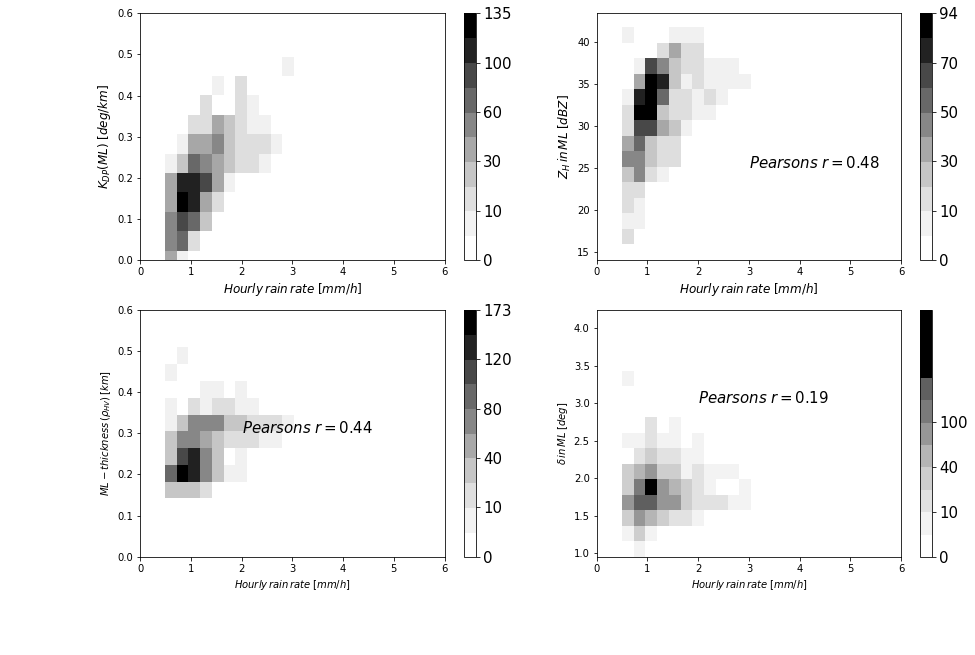

('m', 113.8604651162791)
('cc', -0.12155038759689857)
H
(16, 16)
[0.824999988079071, 0.968999981880188, 2.2623073871319175, 13.569091636817781]
[-974.38311897  261.26423695   -5.25028014]
('yyr', array([12.01573523, 12.21029674, 12.2616836 , 12.16989579, 11.93493331,
       11.55679618, 11.03548438, 10.37099792,  9.5633368 ,  8.61250102,
        7.51849057,  6.28130546,  4.90094569,  3.37741126,  1.71070216]))
('xx', (1879,))
[-37.27612176   8.47202709  -0.11940763]


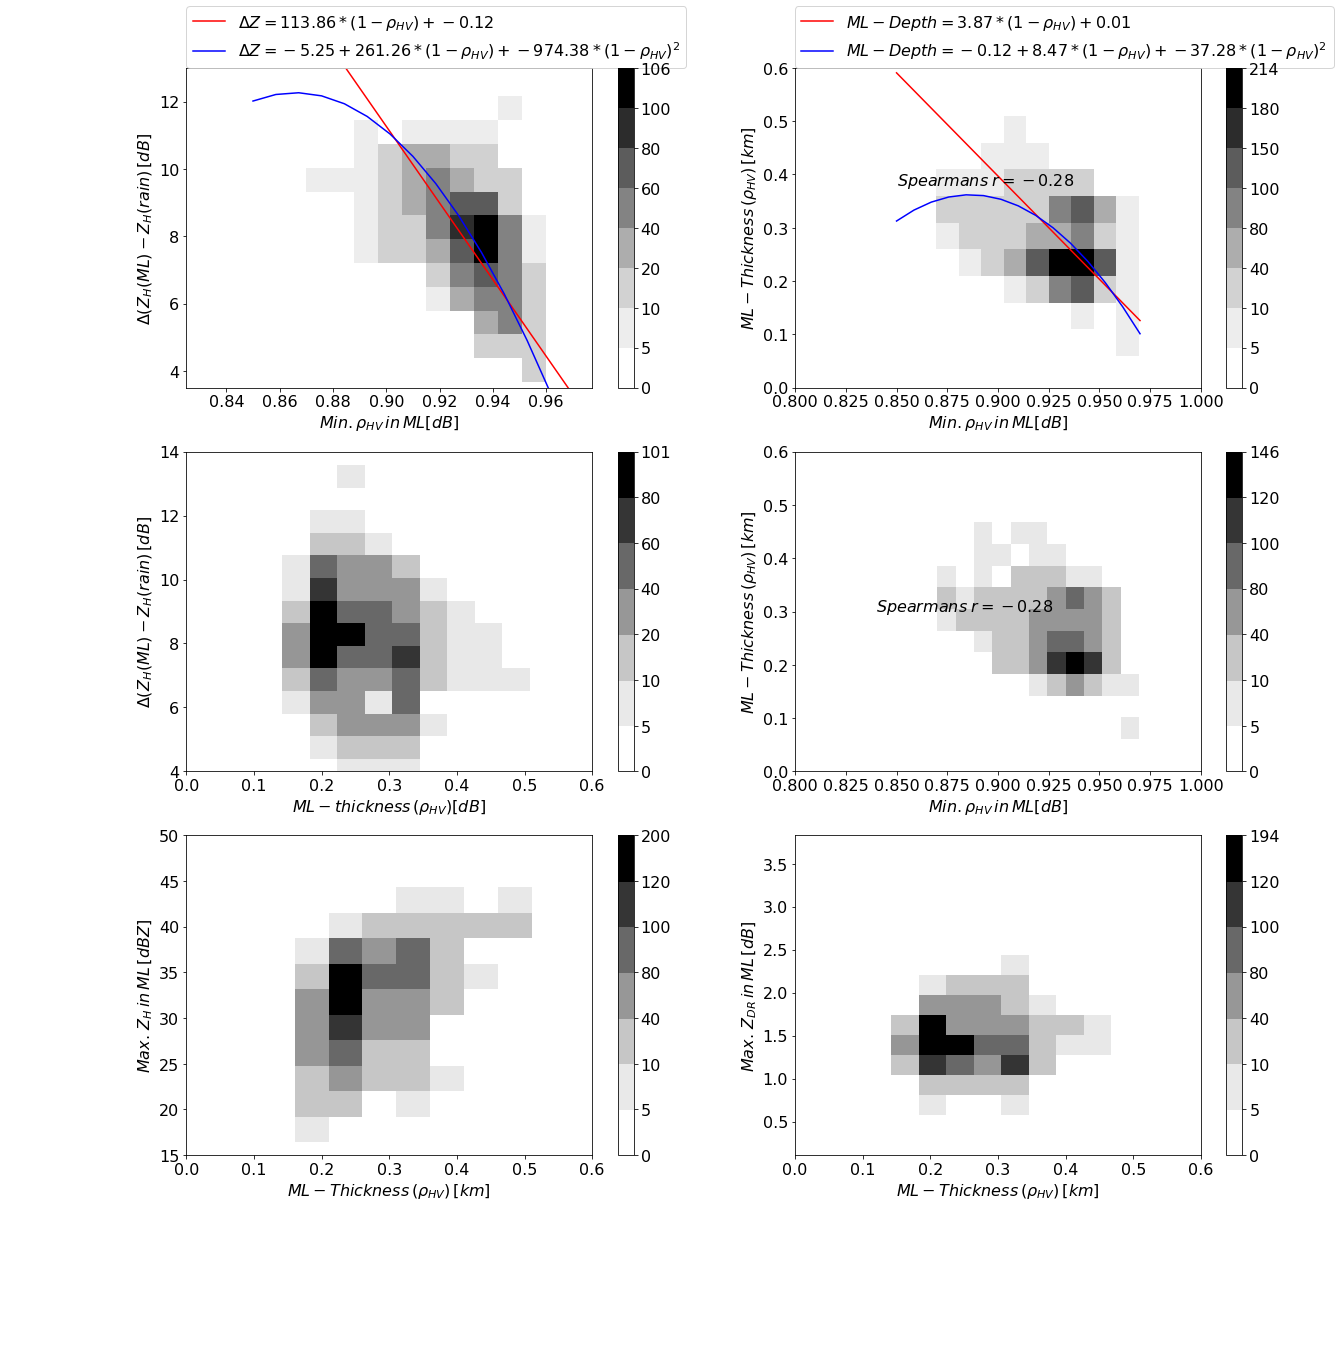

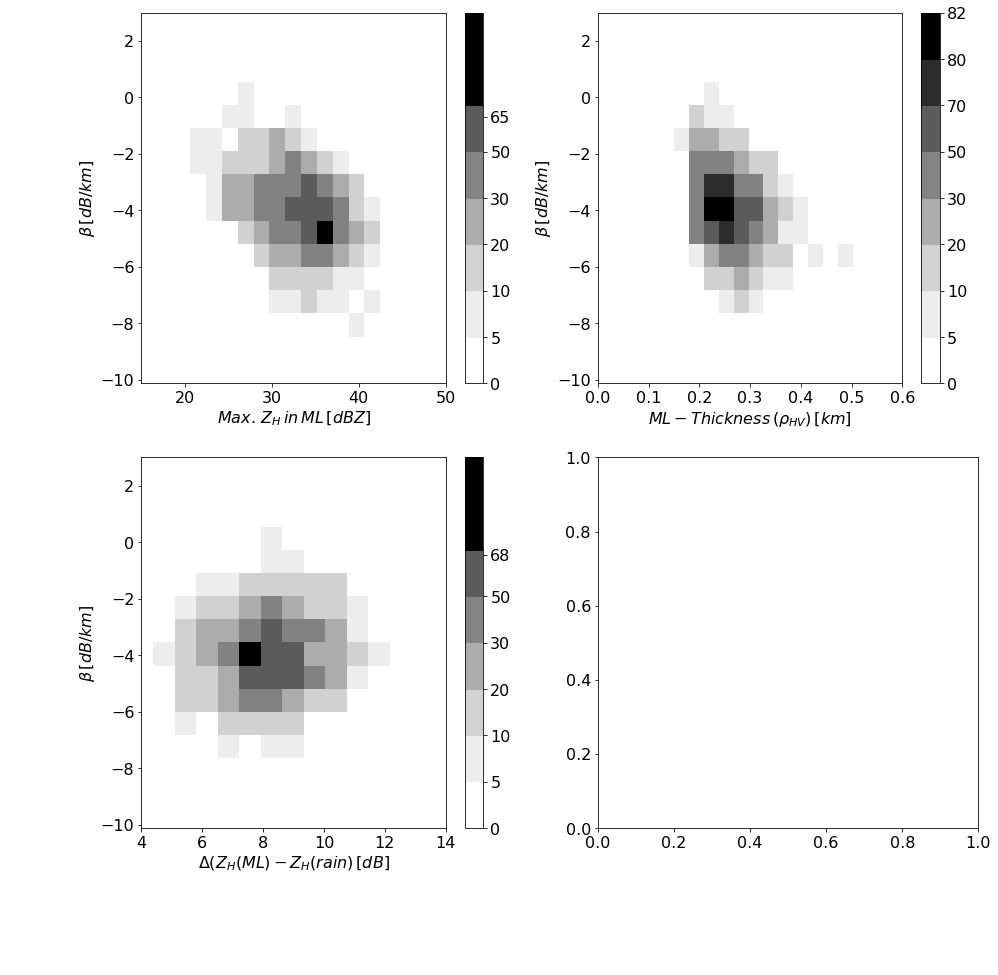

('m', 113.8604651162791)
('cc', -0.12155038759689857)
H
(16, 16)
[0.824999988079071, 0.968999981880188, 2.2623073871319175, 13.569091636817781]
[-974.38311897  261.26423695   -5.25028014]
('yyr', array([12.01573523, 12.21029674, 12.2616836 , 12.16989579, 11.93493331,
       11.55679618, 11.03548438, 10.37099792,  9.5633368 ,  8.61250102,
        7.51849057,  6.28130546,  4.90094569,  3.37741126,  1.71070216]))
('xx', (1879,))
('m', 109.49367088607593)
('cc', 4.436708860759509)
('Wm', 163.99999999999983)
('Wcc', -28.79999999999992)


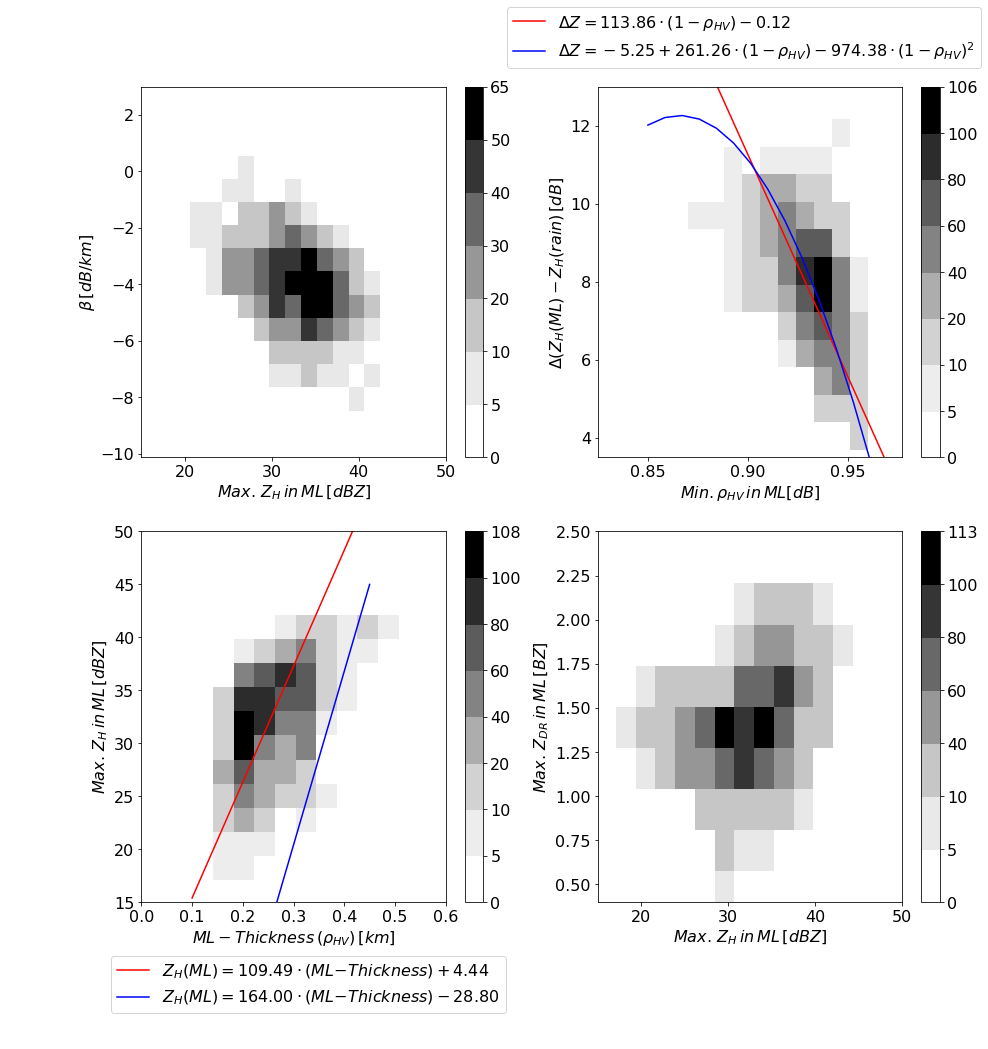

In [157]:
beta_clim=np.stack(beta_clim)

Rmlb_clim=np.stack(Rmlb_clim)
Rmlt_clim=np.stack(Rmlt_clim)
St_h_clim=np.stack(St_h_clim)
Zh_ML_clim=np.stack(Zh_ML_clim)
print('shapes vorZG',Zh_ML_clim.shape, St_h_clim.shape)
Zh_MLs_clim=savitzky_golay(Zh_ML_clim, window_size=13, order=2, deriv=0)

Zh_rain_clim=np.stack(Zh_rain_clim)
Zh_rains_clim=savitzky_golay(Zh_rain_clim, window_size=13, order=2, deriv=0)

Zdr_ML_clim=np.stack(Zdr_ML_clim)
Zdr_MLs_clim=savitzky_golay(Zdr_ML_clim, window_size=13, order=2, deriv=0)

D_ML_clim=np.stack(D_ML_clim)
D_MLs_clim=savitzky_golay(D_ML_clim, window_size=13, order=2, deriv=0)

Zh_snow_clim=np.stack(Zh_snow_clim)
Zh_snows_clim=savitzky_golay(Zh_snow_clim, window_size=13, order=2, deriv=0)

Zhh_clim=np.stack(Zhh_clim)
Zhhs_clim=savitzky_golay(Zhh_clim, window_size=13, order=2, deriv=0)

Rh_clim=np.stack(Rh_clim)

Dh_clim=np.stack(Dh_clim)
Dhs_clim=savitzky_golay(Dh_clim, window_size=13, order=2, deriv=0)
Zdrh_clim=np.stack(Zdrh_clim)
Zdrhs_clim=savitzky_golay(Zdrh_clim, window_size=13, order=2, deriv=0)


Kdp_ML_clim=np.stack(Kdp_ML_clim)
Kdp_MLs_clim=savitzky_golay(Kdp_ML_clim, window_size=13, order=2, deriv=0)

R_ML_clim=np.stack(R_ML_clim)
R_MLs_clim=savitzky_golay(R_ML_clim, window_size=13, order=2, deriv=0)

print(Zh_MLs_clim.shape,St_h_clim.shape)
missing= ((np.isnan(Zh_MLs_clim)) | (Zhhs_clim<0.4) | (np.isnan(St_h_clim)))| np.isnan(Rmlb_clim)| np.isnan(Rmlt_clim)

#Zhdiff=Zhdiff[~missing]
#MLthick=MLthick[~missing]
beta_clim=beta_clim[~missing]
Rmlb_clim=Rmlb_clim[~missing]
Rmlt_clim=Rmlt_clim[~missing]
St_h_clim=St_h_clim[~missing]
Zhh_clim=Zhh_clim[~missing]
Zhhs_clim=Zhhs_clim[~missing]
Zdr_ML_clim=Zdr_ML_clim[~missing]
Zdr_MLs_clim=Zdr_MLs_clim[~missing]
Dh_clim=Dh_clim[~missing]
Dhs_clim=Dhs_clim[~missing]
Rh_clim=Rh_clim[~missing]
D_ML_clim=D_ML_clim[~missing]
D_MLs_clim=D_MLs_clim[~missing]
Zdrh_clim=Zdrh_clim[~missing]
Zdrhs_clim=Zdrhs_clim[~missing]
Zh_ML_clim=Zh_ML_clim[~missing]
Zh_MLs_clim=Zh_MLs_clim[~missing]
Zh_rain_clim=Zh_rain_clim[~missing]
Zh_rains_clim=Zh_rains_clim[~missing]
Zh_snow_clim=Zh_snow_clim[~missing]
Zh_snows_clim=Zh_snows_clim[~missing]
Kdp_ML_clim=Kdp_ML_clim[~missing]
Kdp_MLs_clim=Kdp_MLs_clim[~missing]
R_ML_clim=R_ML_clim[~missing]
R_MLs_clim=R_MLs_clim[~missing]

#MLthick=Zhh_clim-Rh_clim
MLthick=Zhh_clim-Zdrh_clim

MLthicksZh=Zhhs_clim-Zdrhs_clim
#Just try
#MLthicks=Dhs_clim-Zdrhs_clim
MLthicks=Dh_clim-Rh_clim
print('MLthick',MLthicks)
Zhdiff2 = Zh_MLs_clim-Zh_rains_clim



#missing=((MLthick>0.4)|(MLthick<0.0))
missing=((MLthicks<0.0)|(MLthicksZh<0.0))

Rmlb_clim=Rmlb_clim[~missing]
Rmlt_clim=Rmlt_clim[~missing]

beta_clim=beta_clim[~missing]

MLthicks=MLthicks[~missing]
MLthicksZh=MLthicksZh[~missing]

D_ML_clim=D_ML_clim[~missing]
D_MLs_clim=D_MLs_clim[~missing]

Zhdiff2=Zhdiff2[~missing]
St_h_clim=St_h_clim[~missing]
Zh_ML_clim=Zh_ML_clim[~missing]
Zh_MLs_clim=Zh_MLs_clim[~missing]
Zh_rain_clim=Zh_rain_clim[~missing]
Zh_rains_clim=Zh_rains_clim[~missing]
Zdr_ML_clim=Zdr_ML_clim[~missing]
Zdr_MLs_clim=Zdr_MLs_clim[~missing]
Zh_snow_clim=Zh_snow_clim[~missing]
Zh_snows_clim=Zh_snows_clim[~missing]

Kdp_ML_clim=Kdp_ML_clim[~missing]
Kdp_MLs_clim=Kdp_MLs_clim[~missing]
R_ML_clim=R_ML_clim[~missing]
R_MLs_clim=R_MLs_clim[~missing]

MLthickRhv=Rmlt_clim-Rmlb_clim

fig, ax = pl.subplots(2,2, figsize=(15, 10))
matplotlib.rcParams.update({'font.size': 15})
c =np.vstack((St_h_clim,Kdp_MLs_clim))    
df = pd.DataFrame(c.T, columns=['St_h_clim', 'Kdp_MLs_clim']) 
c_St_h_clim_Kdp_MLs_clim=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(St_h_clim, Kdp_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,30, 40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,0].imshow(H,interpolation='nearest',aspect='auto',extent=extent,cmap='Greys',vmin=minperbin,norm=norm1)
pl.colorbar(cp1,ax=ax[0,0])
#ax[0,0].plot(R_ML_clim, Zhdiff,'rx')
ax[0,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_St_h_clim_Kdp_MLs_clim),xy=(2,2),xytext=(2,2))
ax[0,0].set_xlabel(r"$Hourly\, rain\, rate\; [mm/h]$", fontsize=12)
ax[0,0].set_ylabel(r"$K_{DP}(ML)\; [deg/km]$", fontsize=12)
ax[0,0].set_xlim([0,6])
ax[0,0].set_ylim([0,0.6])

c =np.vstack((St_h_clim,Zh_MLs_clim))    
df = pd.DataFrame(c.T, columns=['St_h_clim', 'Zh_MLs_clim']) 
c_St_h_clim_Zh_MLs_clim=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(St_h_clim, Zh_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,30,40,50,60,70,80,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,1].imshow(H,interpolation='nearest',aspect='auto',extent=extent,cmap='Greys',vmin=minperbin,norm=norm1)
pl.colorbar(cp1,ax=ax[0,1])
#ax[0,0].plot(R_ML_clim, Zhdiff,'rx')
ax[0,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_St_h_clim_Zh_MLs_clim),xy=(3,25),xytext=(3,25))
ax[0,1].set_xlabel(r"$Hourly\, rain\, rate\; [mm/h]$", fontsize=12)
ax[0,1].set_ylabel(r"$Z_{H}\, in\,ML\; [dBZ]$", fontsize=12)
ax[0,1].set_xlim([0,6])

c =np.vstack((St_h_clim,MLthickRhv))    
df = pd.DataFrame(c.T, columns=['St_h_clim', 'MLthickRhv']) 
c_St_h_clim_MLthickRhv=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(St_h_clim, MLthickRhv,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,160,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,0].imshow(H,interpolation='nearest',aspect='auto',extent=extent,cmap='Greys',vmin=minperbin,norm=norm1)
pl.colorbar(cp1,ax=ax[1,0])
#ax[0,0].plot(R_ML_clim, Zhdiff,'rx')
ax[1,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_St_h_clim_MLthickRhv),xy=(2,0.3),xytext=(2,0.3))
ax[1,0].set_xlabel(r"$Hourly\, rain\, rate\; [mm/h]$")
ax[1,0].set_ylabel(r"$ML-thickness\,(\rho_{HV})\, [km]$")
ax[1,0].set_xlim([0,6])
ax[1,0].set_ylim([0,0.6])

c =np.vstack((St_h_clim,D_MLs_clim))    
df = pd.DataFrame(c.T, columns=['St_h_clim', 'D_MLs_clim']) 
c_St_h_clim_D_MLs_clim=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(St_h_clim, D_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,100,120,160,180,200,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,1].imshow(H,interpolation='nearest',aspect='auto',extent=extent,cmap='Greys',vmin=minperbin,norm=norm1)
pl.colorbar(cp1,ax=ax[1,1])
#ax[0,0].plot(R_ML_clim, Zhdiff,'rx')
ax[1,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_St_h_clim_D_MLs_clim),xy=(2,3),xytext=(2,3))
ax[1,1].set_xlabel(r"$Hourly\, rain\, rate\; [mm/h]$")
ax[1,1].set_ylabel(r"$\delta\,in\,ML\; [deg]$")
ax[1,1].set_xlim([0,6])



fig.savefig('/home/silke/Python/projects/climatology/Rain_MLThick_FabryZ.png')
pl.show()

#add a final combination
#############################################
matplotlib.rcParams.update({'font.size': 16})
fig, ax = pl.subplots(3,2, figsize=(20, 20))
#nur mit ausgewaehlten Punkten
R_ML_pts=([1-0.96,1-0.94,1-0.93,1-0.925,1-0.92,1-0.89])
Zhdiff2_pts=([4.0,6.0,7.9,9.2,10.2,11.5])
#A = np.vstack([R_ML_clim,np.ones(len(R_ML_clim))]).T
#m,cc=(np.linalg.lstsq(A,Zhdiff2)[0])    
A = np.vstack([R_ML_pts,np.ones(len(R_ML_pts))]).T
m,cc=(np.linalg.lstsq(A,Zhdiff2_pts)[0])   
print('m',m)
print('cc',cc)
c =np.vstack((R_ML_clim,Zhdiff2))    
df = pd.DataFrame(c.T, columns=['R_ML_clim', 'Zhdiff2']) 
c_R_ML_clim_Zhdiff2=df.corr(method='spearman').as_matrix()[1,0]
H, extent, minperbin = scatterdensity(R_ML_clim, Zhdiff2,16)
print('H')
print(H.shape)
print(extent)

maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60, 80,100, maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,0].imshow(H,interpolation='nearest',aspect='auto',extent=extent,cmap='Greys',vmin=minperbin,norm=norm1)
pl.colorbar(cp1,ax=ax[0,0])
R=np.linspace(0.85,0.97,15)
#yy=m*R_ML_clim+cc
yy=m*(1-R)+cc

R_ML_pts=([1-0.96,1-0.94,1-0.93,1-0.925,1-0.92,1-0.89])
Zhdiff2_pts=([4.0,6.0,7.9,9.2,10.2,11.5])
#res = np.polyfit( R_ML_clim, Zhdiff2,2)
res = np.polyfit( R_ML_pts, Zhdiff2_pts,2)
print(res)
#yyr=np.zeros_like(R_ML_pts)
R=np.linspace(0.85,0.97,15)
#yyr= res[2] + res[1] * R_ML_clim + res[0] * R_ML_clim**2.
yyr= res[2] + res[1] * (1-R) + res[0] * (1-R)**2.
print('yyr',yyr)
print('xx',R_ML_clim.shape)
#ax[0,0].plot(R_ML_clim,yy,'r-',label=r'$\Delta Z=%5.2f * \rho_{HV} + %5.2f$' % (m,cc))
ax[0,0].plot(R,yy,'r-',label=r'$\Delta Z=%5.2f * (1-\rho_{HV}) + %5.2f$' % (m,cc))
#ax[0,0].plot(R_ML_clim,yyr,'b-',label=r'$\Delta Z=%5.2f + %5.2f * \rho_{HV} + %5.2f * \rho_{HV}^2$' % (res[2],res[1],res[0]))
ax[0,0].plot(R,yyr,'b-',label=r'$\Delta Z=%5.2f + %5.2f * (1-\rho_{HV}) + %5.2f * (1-\rho_{HV})^2$' % (res[2],res[1],res[0]))
#ax[0,0].plot(R_ML_clim, Zhdiff,'rx')
ax[0,0].annotate(r'$Spearmans\; r=%5.2f$' %(c_R_ML_clim_Zhdiff2),xy=(0.84,13.5),xytext=(0.84,13.5))
ax[0,0].set_xlabel(r"$Min. \rho_{HV}\,in\,ML [dB]$")
ax[0,0].set_ylabel(r"$\Delta(Z_{H}(ML)-Z_{H}(rain)\, [dB]$")
ax[0,0].set_ylim([3.5,13])
handles, labels = ax[0,0].get_legend_handles_labels()
ax[0,0].legend(handles, labels, bbox_to_anchor=(0., 1), loc=[0,0], borderaxespad=0.)

#### hier anpassen

R_ML_pts=([1-0.97,1-0.95,1-0.93,1-0.92,1-0.9,1-0.87])
MLthickRhv_pts=([0.1,0.2,0.3,0.34,0.42,0.48])
#B = np.vstack([R_ML_clim,np.ones(len(R_ML_clim))]).T
B = np.vstack([(R_ML_pts),np.ones(len(R_ML_pts))]).T
#n,dd=(np.linalg.lstsq(B,MLthicksZh)[0])     
n,dd=(np.linalg.lstsq(B,MLthickRhv_pts)[0])     

c =np.vstack((R_ML_clim,MLthickRhv))    
df = pd.DataFrame(c.T, columns=['R_ML_clim', 'MLthickRhv']) 
c_R_ML_clim_MLthickRhv=df.corr(method='spearman').as_matrix()[1,0]
#ax[1,0].plot(R_ML_clim, MLthick,'rx')
H, extent, minperbin = scatterdensity(R_ML_clim, MLthickRhv,13)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,80,100,150,180,maxh]
norm1 = get_norm(ticks1)
#zz=n*R_ML_clim+dd
zz=n*(1-R)+dd

#res = stats.theilslopes(MLthicksZh, R_ML_clim, 0.90)
#zzr= res[1] + res[0] * R_ML_clim
R_ML_pts=([1-0.97,1-0.95,1-0.93,1-0.92,1-0.9,1-0.87])
MLthickRhv_pts=([0.1,0.2,0.32,0.32,0.33,0.36])
#res = np.polyfit( R_ML_clim, MLthicksZh,2)
res = np.polyfit( R_ML_pts, MLthickRhv_pts,2)
print(res)
#zzr= res[2] + res[1] * R_ML_clim + res[0] * R_ML_clim**2.
zzr= res[2] + res[1] * (1-R) + res[0] * (1-R)**2.
cp1 = ax[0,1].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
#ax[0,1].plot(R_ML_clim,zz,'r-',label=r'$ML-Depth =%5.2f * \rho_{HV} + %5.2f$' % (n,dd))
ax[0,1].plot(R,zz,'r-',label=r'$ML-Depth =%5.2f * (1-\rho_{HV}) + %5.2f$' % (n,dd))
#ax[0,1].plot(R_ML_clim,zzr,'b-',label=r'$ML-Depth=%5.2f + %5.2f * \rho_{HV} + %5.2f * \rho_{HV}^2$' % (res[2],res[1],res[0]))
ax[0,1].plot(R,zzr,'b-',label=r'$ML-Depth=%5.2f + %5.2f * (1-\rho_{HV}) + %5.2f * (1-\rho_{HV})^2$' % (res[2],res[1],res[0]))
pl.colorbar(cp1,ax=ax[0,1])
ax[0,1].annotate(r'$Spearmans\; r=%5.2f$' %(c_R_ML_clim_MLthickRhv),xy=(0.85,0.38),xytext=(0.85,0.38))
ax[0,1].set_xlabel(r"$Min. \rho_{HV}\,in\,ML [dB]$")
ax[0,1].set_ylabel(r"$ML-Thickness\,(\rho_{HV})\, [km]$")
ax[0,1].set_ylim([0.0,0.6])
ax[0,1].set_xlim([0.8,1.0])
#ax[1,0].set_xlim([0.75,1.1])
handles, labels = ax[0,1].get_legend_handles_labels()
ax[0,1].legend(handles, labels, bbox_to_anchor=(0., 1), loc=[0,1], borderaxespad=0.)

c =np.vstack((MLthickRhv,Zhdiff2))    
df = pd.DataFrame(c.T, columns=['MLthickRhv', 'Zhdiff2']) 
c_MLthickRhv_Zhdiff2=df.corr(method='spearman').as_matrix()[1,0]
H, extent, minperbin = scatterdensity(MLthickRhv, Zhdiff2,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80, maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,0].imshow(H,interpolation='nearest',aspect='auto',extent=extent,cmap='Greys',vmin=minperbin,norm=norm1)
pl.colorbar(cp1,ax=ax[1,0])
#ax[0,0].plot(R_ML_clim, Zhdiff,'rx')
ax[1,0].annotate(r'$Spearmans\; r=%5.2f$' %(c_MLthickRhv_Zhdiff2),xy=(0.84,13),xytext=(0.84,13))
ax[1,0].set_xlabel(r"$ ML-thickness\,(\rho_{HV}) [dB]$")
ax[1,0].set_ylabel(r"$\Delta(Z_{H}(ML)-Z_{H}(rain)\, [dB]$")
ax[1,0].set_ylim([4,14])
ax[1,0].set_xlim([0.,0.6])


c =np.vstack((R_ML_clim, MLthickRhv))    
df = pd.DataFrame(c.T, columns=['R_ML_clim', 'MLthickRhv']) 
c_R_ML_clim_MLthickRhv=df.corr(method='spearman').as_matrix()[1,0]
#ax[1,0].plot(R_ML_clim, MLthick,'rx')
H, extent, minperbin = scatterdensity(R_ML_clim, MLthickRhv,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,80,100, 120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,1].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,1])
ax[1,1].annotate(r'$Spearmans\; r=%5.2f$' %(c_R_ML_clim_MLthickRhv),xy=(0.84,0.3),xytext=(0.84,0.3))
ax[1,1].set_xlabel(r"$Min. \rho_{HV}\,in\,ML [dB]$")
ax[1,1].set_ylabel(r"$ML-Thickness\,(\rho_{HV})\, [km]$")
ax[1,1].set_xlim([0.8,1.0])
ax[1,1].set_ylim([0,0.6])
#ax[1,0].set_xlim([0.75,1.1])


c =np.vstack((MLthickRhv, Zh_ML_clim))    
df = pd.DataFrame(c.T, columns=['MLthickRhv', 'Zh_ML_clim']) 
c_MLthickRhv_Zh_ML_clim=df.corr(method='spearman').as_matrix()[1,0]
#ax[1,0].plot(R_ML_clim, MLthick,'rx')
H, extent, minperbin = scatterdensity(MLthickRhv, Zh_ML_clim,13)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,80,100, 120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[2,0].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[2,0])
ax[2,0].annotate(r'$Spearmans\; r=%5.2f$' %(c_MLthickRhv_Zh_ML_clim),xy=(0.84,0.3),xytext=(0.84,0.3))
ax[2,0].set_ylabel(r"$Max.\, Z_H\,in\,ML\, [dBZ]$")
ax[2,0].set_xlabel(r"$ML-Thickness\,(\rho_{HV})\, [km]$")
ax[2,0].set_xlim([0.,0.6])
ax[2,0].set_ylim([15,50])
#ax[2,0].set_ylim([4,14])


c =np.vstack((MLthickRhv, Zdr_ML_clim))    
df = pd.DataFrame(c.T, columns=['MLthickRhv', 'Zdr_ML_clim']) 
c_MLthickRhv_Zdr_ML_clim=df.corr(method='spearman').as_matrix()[1,0]
#ax[1,0].plot(R_ML_clim, MLthick,'rx')
H, extent, minperbin = scatterdensity(MLthickRhv, Zdr_ML_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,80,100, 120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[2,1].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[2,1])
ax[2,1].annotate(r'$Spearmans\; r=%5.2f$' %(c_MLthickRhv_Zdr_ML_clim),xy=(0.84,0.3),xytext=(0.84,0.3))
ax[2,1].set_ylabel(r"$Max.\, Z_{DR}\,in\,ML\, [dB]$")
ax[2,1].set_xlabel(r"$ML-Thickness\,(\rho_{HV})\, [km]$")
ax[2,1].set_xlim([0,0.6])
#ax[2,1].set_ylim([4,14])

fig.savefig('/home/silke/Python/projects/climatology/Final-important.png')
pl.show()


fig, ax = pl.subplots(2,2, figsize=(15, 15))
c =np.vstack((Zh_ML_clim, beta_clim))    
df = pd.DataFrame(c.T, columns=['Zh_ML_clim', 'beta_clim']) 
c_Zh_ML_clim_beta_clim=df.corr(method='spearman').as_matrix()[1,0]
#ax[1,0].plot(R_ML_clim, MLthick,'rx')
H, extent, minperbin = scatterdensity(Zh_ML_clim, beta_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,30, 50, 70, 80,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,0].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,0])
ax[0,0].annotate(r'$Spearmans\; r=%5.2f$' %(c_Zh_ML_clim_beta_clim),xy=(0.84,0.3),xytext=(0.84,0.3))
ax[0,0].set_ylabel(r"$\beta\, [dB/km]$")
ax[0,0].set_xlabel(r"$Max.\, Z_H\,in\,ML\, [dBZ]$")
ax[0,0].set_xlim([15,50])

c =np.vstack((MLthickRhv, beta_clim))    
df = pd.DataFrame(c.T, columns=['MLthickRhv', 'beta_clim']) 
c_MLthickRhv_beta_clim=df.corr(method='spearman').as_matrix()[1,0]
#ax[1,0].plot(R_ML_clim, MLthick,'rx')
H, extent, minperbin = scatterdensity(MLthickRhv, beta_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,30, 50, 70, 80,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,1].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,1])
ax[0,1].annotate(r'$Spearmans\; r=%5.2f$' %(c_MLthickRhv_beta_clim),xy=(0.84,0.3),xytext=(0.84,0.3))
ax[0,1].set_ylabel(r"$\beta\, [dB/km]$")
ax[0,1].set_xlabel(r"$ML-Thickness\,(\rho_{HV})\, [km]$")
ax[0,1].set_xlim([0,0.6])

c =np.vstack((Zhdiff2, beta_clim))    
df = pd.DataFrame(c.T, columns=['Zhdiff2', 'beta_clim']) 
c_Zhdiff2_beta_clim=df.corr(method='spearman').as_matrix()[1,0]
#ax[1,0].plot(R_ML_clim, MLthick,'rx')
H, extent, minperbin = scatterdensity(Zhdiff2, beta_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,30, 50, 70, 80,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,0].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,0])
ax[1,0].annotate(r'$Spearmans\; r=%5.2f$' %(c_Zhdiff2_beta_clim),xy=(0.84,0.3),xytext=(0.84,0.3))
ax[1,0].set_ylabel(r"$\beta\, [dB/km]$")
ax[1,0].set_xlabel(r"$\Delta(Z_{H}(ML)-Z_{H}(rain)\, [dB]$")
ax[1,0].set_xlim([4,14])
fig.savefig('/home/silke/Python/projects/climatology/Final-important_2.png')
pl.show()

######################################
######################################
fig, ax = pl.subplots(2,2, figsize=(15, 15))
c =np.vstack((Zh_ML_clim, beta_clim))    
df = pd.DataFrame(c.T, columns=['Zh_ML_clim', 'beta_clim']) 
c_Zh_ML_clim_beta_clim=df.corr(method='spearman').as_matrix()[1,0]
#ax[1,0].plot(R_ML_clim, MLthick,'rx')
H, extent, minperbin = scatterdensity(Zh_ML_clim, beta_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,30, 40,50,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,0].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,0])
ax[0,0].annotate(r'$Spearmans\; r=%5.2f$' %(c_Zh_ML_clim_beta_clim),xy=(0.84,0.3),xytext=(0.84,0.3))
ax[0,0].set_ylabel(r"$\beta\, [dB/km]$")
ax[0,0].set_xlabel(r"$Max.\, Z_H\,in\,ML\, [dBZ]$")
ax[0,0].set_xlim([15,50])



R_ML_pts=([1-0.96,1-0.94,1-0.93,1-0.925,1-0.92,1-0.89])
Zhdiff2_pts=([4.0,6.0,7.9,9.2,10.2,11.5])
#A = np.vstack([R_ML_clim,np.ones(len(R_ML_clim))]).T
#m,cc=(np.linalg.lstsq(A,Zhdiff2)[0])    
A = np.vstack([R_ML_pts,np.ones(len(R_ML_pts))]).T
m,cc=(np.linalg.lstsq(A,Zhdiff2_pts)[0])   
print('m',m)
print('cc',cc)
c =np.vstack((R_ML_clim,Zhdiff2))    
df = pd.DataFrame(c.T, columns=['R_ML_clim', 'Zhdiff2']) 
c_R_ML_clim_Zhdiff2=df.corr(method='spearman').as_matrix()[1,0]
H, extent, minperbin = scatterdensity(R_ML_clim, Zhdiff2,16)
print('H')
print(H.shape)
print(extent)

maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60, 80,100, maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,1].imshow(H,interpolation='nearest',aspect='auto',extent=extent,cmap='Greys',vmin=minperbin,norm=norm1)
pl.colorbar(cp1,ax=ax[0,1])
R=np.linspace(0.85,0.97,15)
#yy=m*R_ML_clim+cc
yy=m*(1-R)+cc

R_ML_pts=([1-0.96,1-0.94,1-0.93,1-0.925,1-0.92,1-0.89])
Zhdiff2_pts=([4.0,6.0,7.9,9.2,10.2,11.5])
#res = np.polyfit( R_ML_clim, Zhdiff2,2)
res = np.polyfit( R_ML_pts, Zhdiff2_pts,2)
print(res)
#yyr=np.zeros_like(R_ML_pts)
R=np.linspace(0.85,0.97,15)
#yyr= res[2] + res[1] * R_ML_clim + res[0] * R_ML_clim**2.
yyr= res[2] + res[1] * (1-R) + res[0] * (1-R)**2.
print('yyr',yyr)
print('xx',R_ML_clim.shape)
#ax[0,0].plot(R_ML_clim,yy,'r-',label=r'$\Delta Z=%5.2f * \rho_{HV} + %5.2f$' % (m,cc))
ax[0,1].plot(R,yy,'r-',label=r'$\Delta Z=%5.2f \cdot (1-\rho_{HV})  %5.2f$' % (m,cc))
#ax[0,0].plot(R_ML_clim,yyr,'b-',label=r'$\Delta Z=%5.2f + %5.2f * \rho_{HV} + %5.2f * \rho_{HV}^2$' % (res[2],res[1],res[0]))
ax[0,1].plot(R,yyr,'b-',label=r'$\Delta Z=%5.2f + %5.2f \cdot (1-\rho_{HV})  %5.2f \cdot (1-\rho_{HV})^2$' % (res[2],res[1],res[0]))
#ax[0,0].plot(R_ML_clim, Zhdiff,'rx')
ax[0,1].annotate(r'$Spearmans\; r=%5.2f$' %(c_R_ML_clim_Zhdiff2),xy=(0.84,13.5),xytext=(0.84,13.5))
ax[0,1].set_xlabel(r"$Min. \rho_{HV}\,in\,ML [dB]$")
ax[0,1].set_ylabel(r"$\Delta(Z_{H}(ML)-Z_{H}(rain)\, [dB]$")
ax[0,1].set_ylim([3.5,13])
handles, labels = ax[0,1].get_legend_handles_labels()
ax[0,1].legend(handles, labels, bbox_to_anchor=(-0.3, 1.05), loc=[0,0], borderaxespad=0.)

### Analoge Grafik zu Wolfensberger et al., hier soll nun eine Regression an eigene Daten und diese
### auch verglichen werden mit geschätzter Regression für Wolfensberger-Grafik
Thick_pts=([0.18,0.25,0.3,0.35])
ZhML_pts=([25,30,38,43])
A1 = np.vstack([Thick_pts,np.ones(len(Thick_pts))]).T
m1,cc1=(np.linalg.lstsq(A1,ZhML_pts)[0])   
print('m',m1)
print('cc',cc1)
Thick=np.linspace(0.1,0.45,15)
yy1=m1*Thick+cc1
# Variante fuer Wolfensberger
WThick_pts=([0.25,0.3,0.35,0.4])
WZhML_pts=([12,20,30,36])
WA1 = np.vstack([WThick_pts,np.ones(len(WThick_pts))]).T
Wm1,Wcc1=(np.linalg.lstsq(WA1,WZhML_pts)[0])   
print('Wm',Wm1)
print('Wcc',Wcc1)
WThick=np.linspace(0.1,0.45,15)
Wyy1=Wm1*WThick+Wcc1


c =np.vstack((MLthickRhv, Zh_ML_clim))    
df = pd.DataFrame(c.T, columns=['MLthickRhv', 'Zh_ML_clim']) 
c_MLthickRhv_Zh_ML_clim=df.corr(method='spearman').as_matrix()[1,0]
#ax[1,0].plot(R_ML_clim, MLthick,'rx')
H, extent, minperbin = scatterdensity(MLthickRhv, Zh_ML_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,0].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,0])
ax[1,0].annotate(r'$Spearmans\; r=%5.2f$' %(c_MLthickRhv_Zh_ML_clim),xy=(0.84,0.3),xytext=(0.84,0.3))
ax[1,0].plot(Thick,yy1,'r-',label=r'$Z_H (ML)=%5.2f \cdot (ML\!-\!Thickness) + %5.2f$' % (m1,cc1))
ax[1,0].plot(WThick,Wyy1,'b-',label=r'$Z_H (ML)=%5.2f \cdot (ML\!-\!Thickness) %5.2f$' % (Wm1,Wcc1))
ax[1,0].set_ylabel(r"$Max.\, Z_H\,in\,ML\, [dBZ]$")
ax[1,0].set_xlabel(r"$ML-Thickness\,(\rho_{HV})\, [km]$")
ax[1,0].set_xlim([0.,0.6])
ax[1,0].set_ylim([15,50])
handles, labels = ax[1,0].get_legend_handles_labels()
ax[1,0].legend(handles, labels, bbox_to_anchor=(-0.1, -0.3), loc=[0,0], borderaxespad=0.)
#ax[2,0].set_ylim([4,14])


c =np.vstack((Zh_ML_clim,Zdr_ML_clim))    
df = pd.DataFrame(c.T, columns=[ 'Zh_ML_clim', 'Zdr_ML_clim']) 
c_Zh_ML_clim_Zdr_ML_clim=df.corr(method='spearman').as_matrix()[1,0]
#ax[1,0].plot(R_ML_clim, MLthick,'rx')
H, extent, minperbin = scatterdensity(Zh_ML_clim,Zdr_ML_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,60, 80,100,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,1].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,1])
ax[1,1].annotate(r'$Spearmans\; r=%5.2f$' %(c_Zh_ML_clim_Zdr_ML_clim),xy=(0.84,0.3),xytext=(0.84,0.3))
ax[1,1].set_xlabel(r"$Max.\, Z_H\,in\,ML\, [dBZ]$")
ax[1,1].set_ylabel(r"$Max.\, Z_{DR}\,in\,ML\, [BZ]$")
ax[1,1].set_ylim([0.4,2.5])
ax[1,1].set_xlim([15,50])

fig.savefig('/home/silke/Python/projects/climatology/Paper_2.png')
pl.show()